### Цель проекта:

**Цель проекта - выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье. Определим, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов.**

----

## Часть 1: Исследуем данные


----

### Данные

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

#### all_sites_scores.csv

-----

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

----
----

#### fandango_scape.csv

Файл `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Часть 2: Сравниваем рейтинги Fandango и другие пользовательские рейтинги

Сначала давайте изучим рейтинги Fandango и посмотрим, совпадут ли результаты нашего анализа с выводами в статье.


In [20]:
fandango = pd.read_csv("fandango_scrape.csv")

In [21]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [22]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [23]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Изучим связь между популярностью фильма и его рейтингом. Нарисуем график scatterplot, показывающий связь между колонками RATING и VOTES.**

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

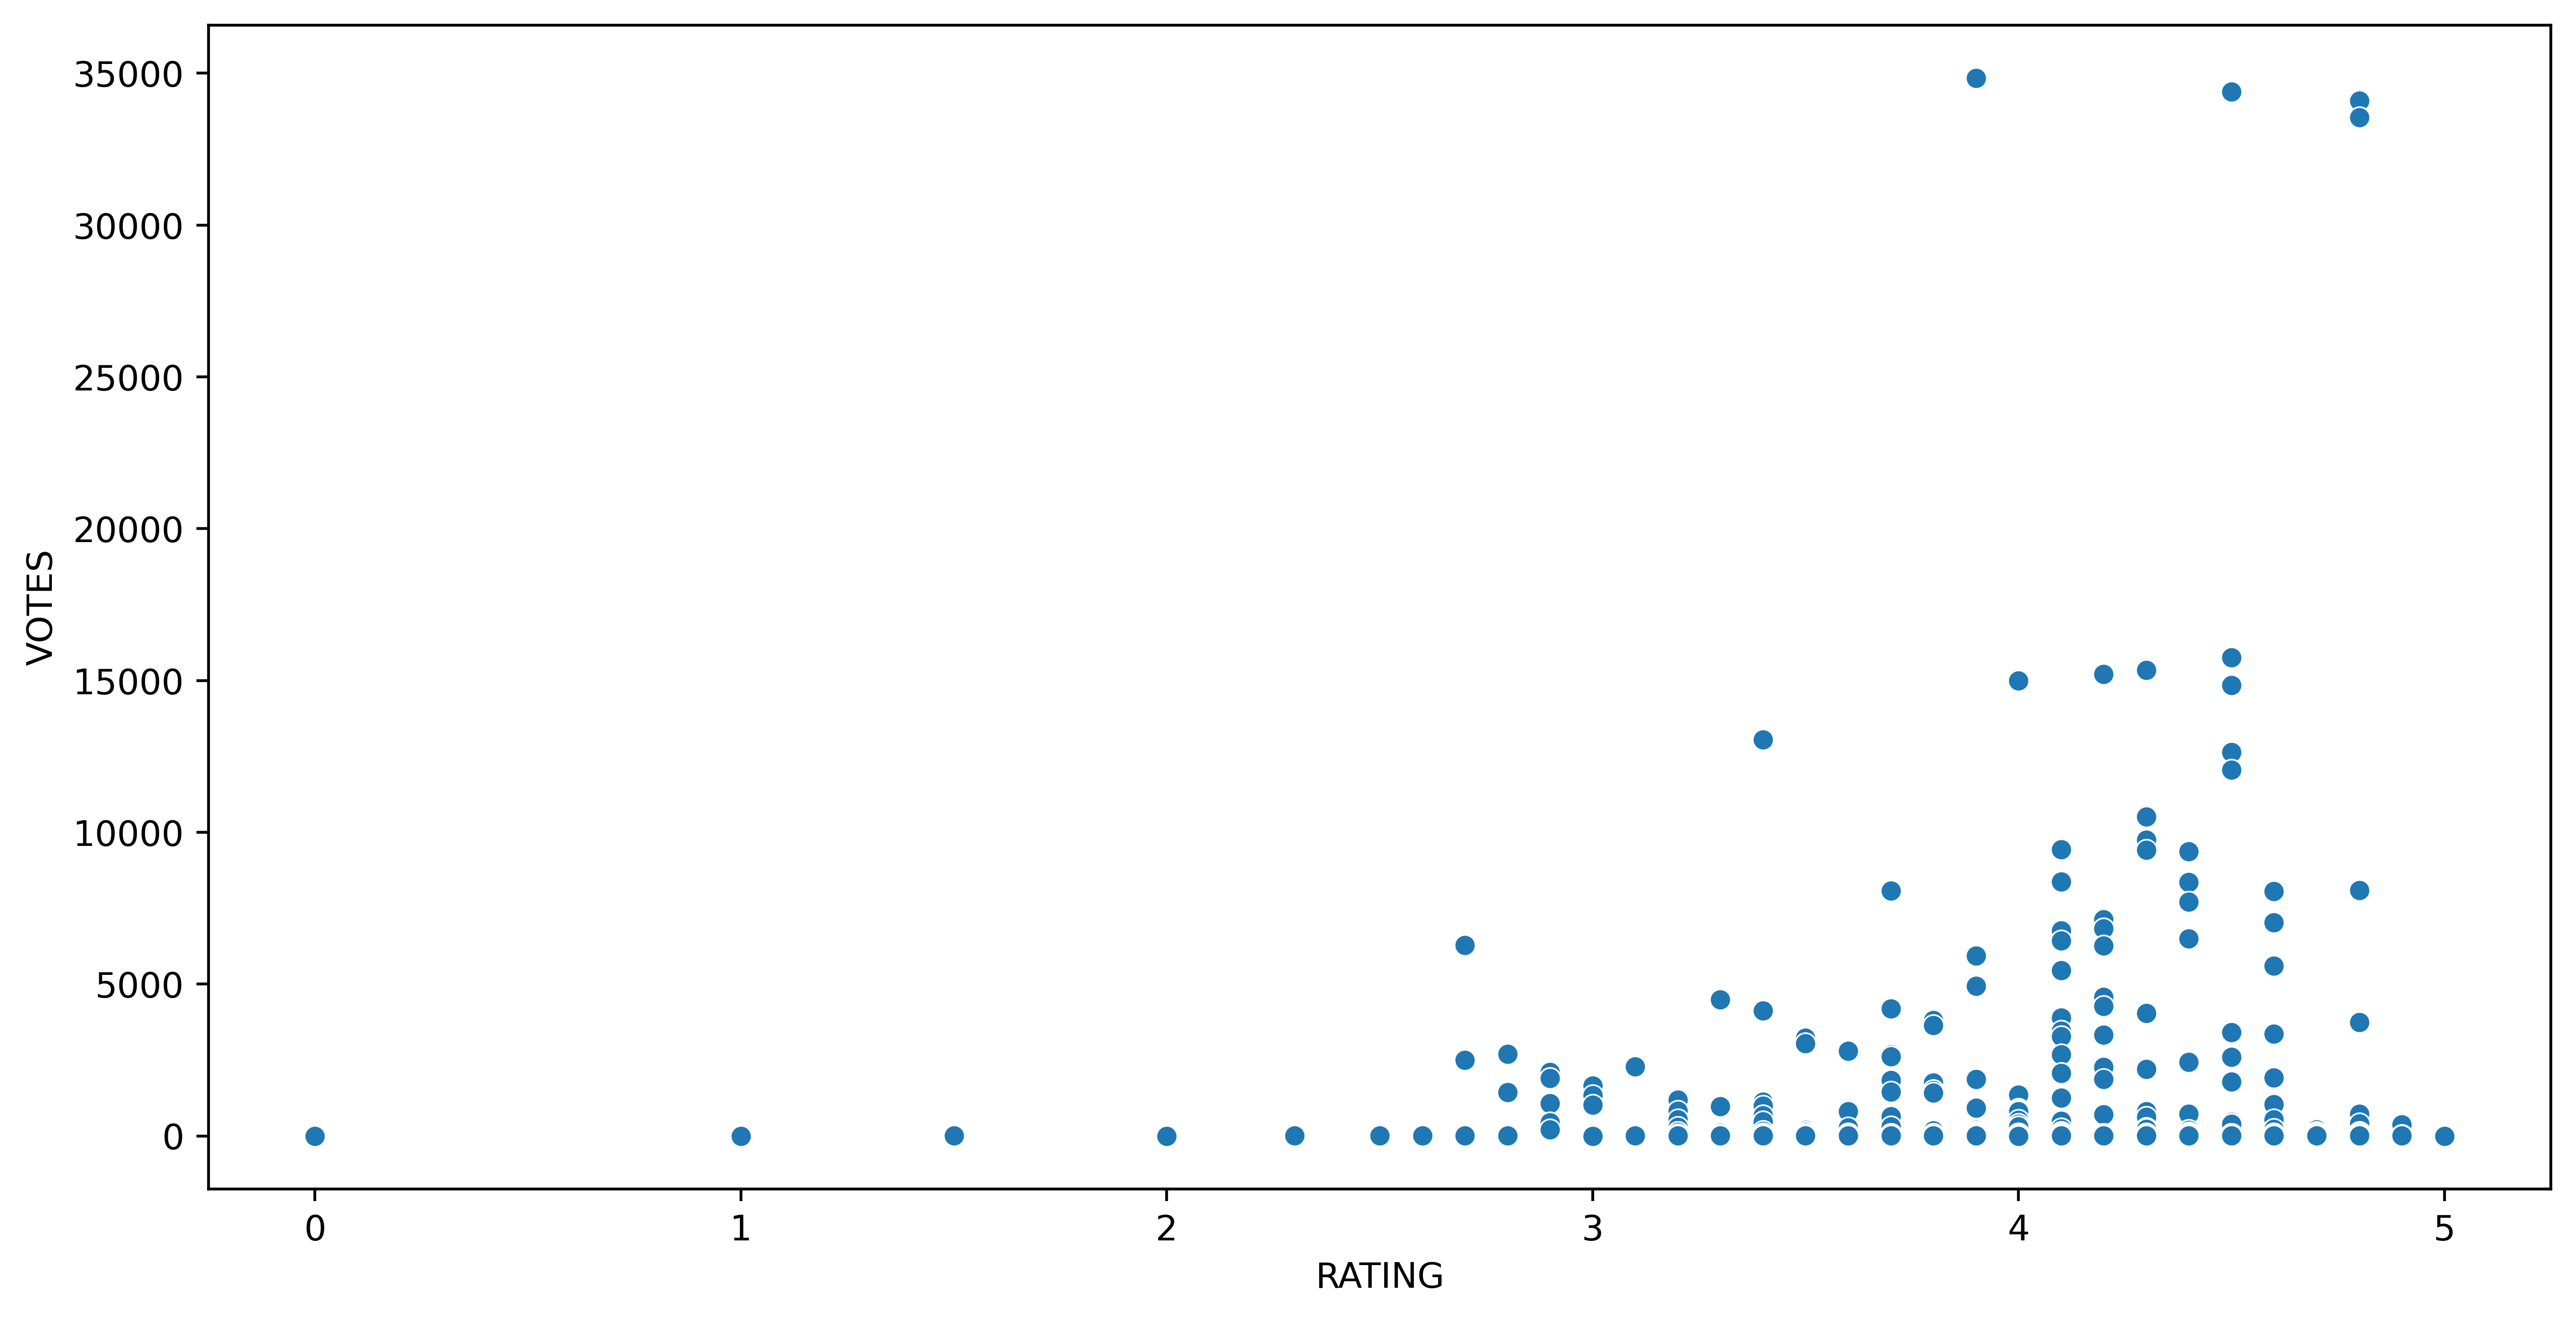

In [24]:
plt.figure(figsize = (12, 6), dpi = 500)
sns.scatterplot(y = 'VOTES', x = 'RATING', data = fandango)

In [25]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Сделаем предположение, что каждая строка в колонке FILM содержит значение в следующем формате:**

    Название Фильма (Год)
    
**Создаём новую колонку, в ней возьмьмём из строки FILM только год.**

In [26]:
def year(str):
    return str.split()[-1][1:-1]
fandango['YEAR'] = fandango['FILM'].apply(year)
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Сколько фильмов содержится в наборе данных Fandango, в разбивке по годам?**

In [27]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**Зарисуем график**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

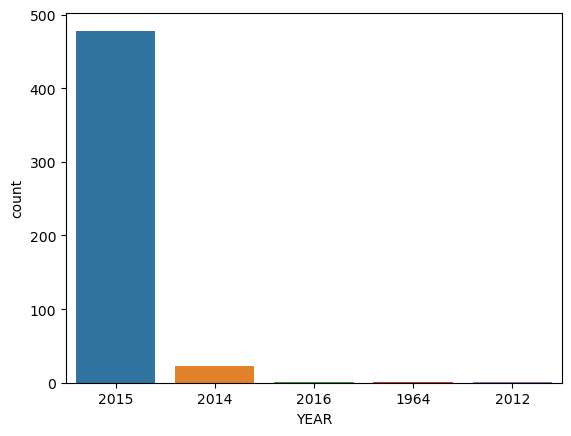

In [28]:
sns.countplot(x = 'YEAR',data = fandango)

**ЗАДАНИЕ: Какие 10 фильмов получили наибольшее количество голосов (votes)?**

In [29]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fandango.sort_values('VOTES', ascending= False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**ЗАДАНИЕ: Сколько фильмов имеет нулевое количество голосов (votes)?**

In [36]:
len(fandango[fandango['VOTES'] == 0])

0

**Создадим DataFrame только с теми фильмами, которые имеют голоса (votes)**

In [31]:
fandango = fandango[fandango['VOTES'] != 0]

----

**Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю. Давайте визуализируем эту разницу распределений.**

**Создаём график KDE plot (или несколько таких графиков), который отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING).**

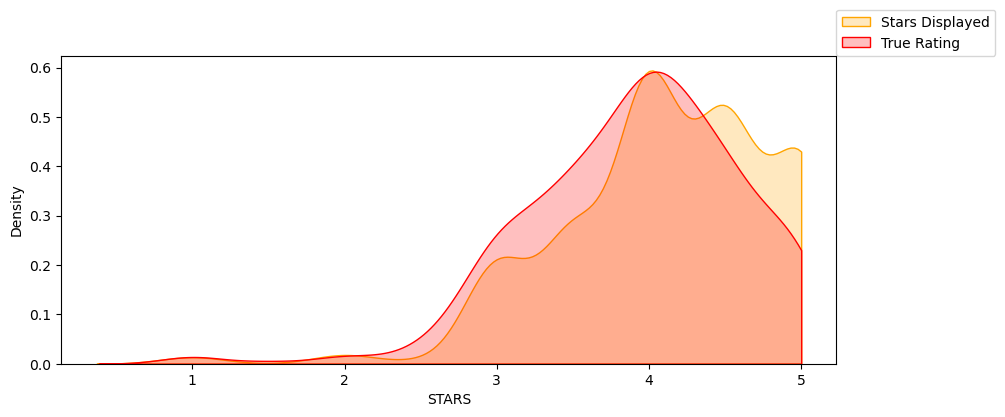

In [32]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
plt.figure(figsize = (10, 4))
sns.kdeplot(x = 'STARS',  data = fandango, color = 'orange', shade = True,label='Stars Displayed',  clip = [0, 5])
sns.kdeplot(x = 'RATING',  data = fandango, color = 'red', shade = True, label='True Rating', clip = [0, 5] )
plt.legend(loc = [1, 1])

**Теперь посчитаем эту разницу в численном виде.**

In [33]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fandango['STARS_DIFF'] = round(fandango['STARS'] - fandango['RATING'], 2)

C:\Users\dns\AppData\Local\Temp\ipykernel_13300\72887729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango['STARS_DIFF'] = round(fandango['STARS'] - fandango['RATING'], 2)


In [37]:
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**НарисуЕМ график count plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

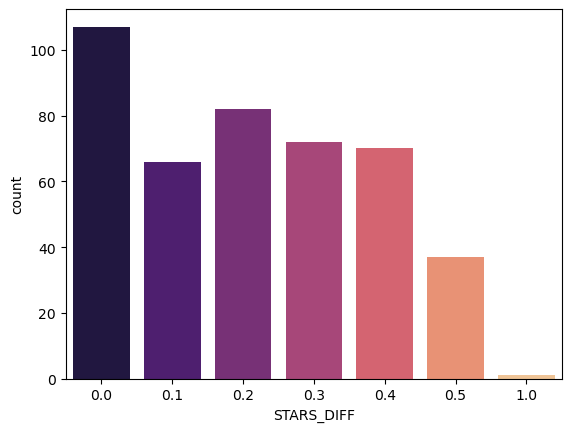

In [38]:
sns.countplot(x = 'STARS_DIFF', data = fandango, palette= 'magma')

**На этом графике мы видим, что один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом!**

In [39]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
fandango[fandango['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний

Давайте посмотрим, как рейтинги Fandango соотносятся с рейтингами других компаний.


In [40]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [41]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [42]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


### Рейтинги от Rotten Tomatoes

Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

**Нарисуем график scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.**

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

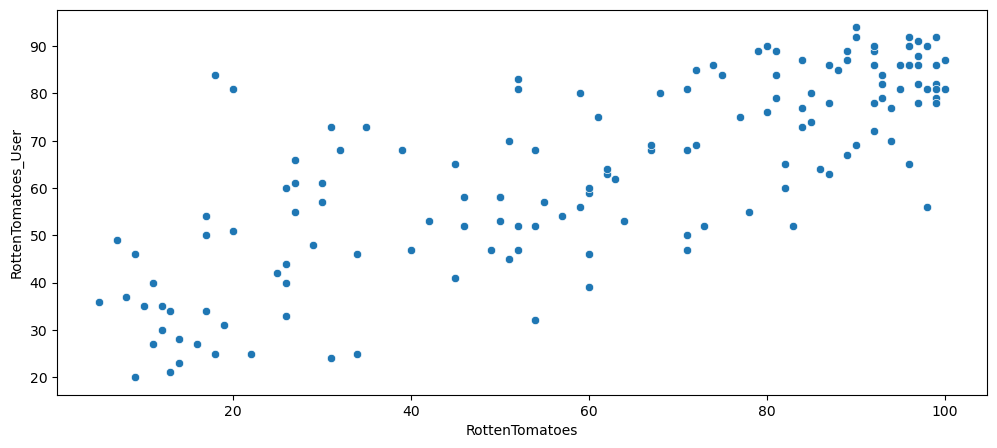

In [43]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = 'RottenTomatoes', y = 'RottenTomatoes_User', data = all_sites)

Давайте изучим численную разницу между этими двумя рейтингами. Мы посчитаем эту разницу с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

**Создаём новую колонку, в которой сохраним разницу между рейтингом от критиков и пользовательским рейтингом для Rotten Tomatoes.**

In [44]:
all_sites['RT_DIFF'] =  all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

In [45]:
np.abs(all_sites['RT_DIFF']).mean()

15.095890410958905

**Нарисуем график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

<Figure size 2000x800 with 0 Axes>

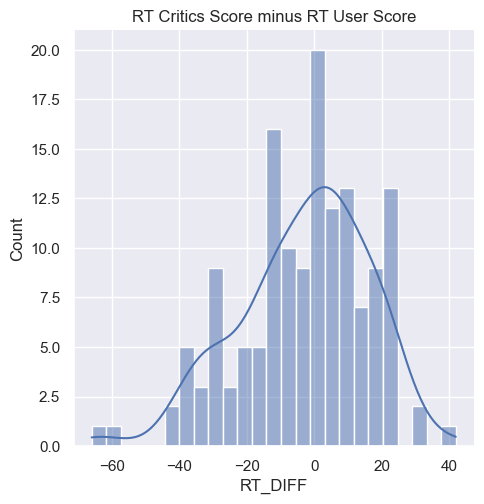

In [46]:
plt.figure(figsize=(10,4),dpi=200)
sns.set(style='darkgrid')
sns.displot(x = all_sites['RT_DIFF'], data = all_sites, kde=True,bins=25)
plt.title("RT Critics Score minus RT User Score");

**Далее нарисуем график распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

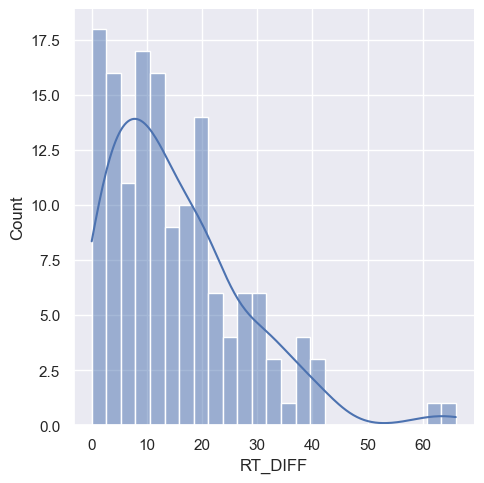

In [47]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
sns.displot(x = np.abs(all_sites['RT_DIFF']), data = all_sites, kde=True,bins=25)

**Какие 5 фильмов в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков:**

In [49]:
all_sites.sort_values('RT_DIFF')[['FILM', 'RT_DIFF']][:5]

,FILM,RT_DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Далее наоборот - отобразим 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей.**

In [50]:
all_sites.sort_values('RT_DIFF', ascending=False)[['FILM', 'RT_DIFF']][:5]

,FILM,RT_DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## Рейтинги от MetaCritic

Далее давайте взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

**Нарисуем график scatterplot для сравнения рейтингов Metacritic и Metacritic User.**

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

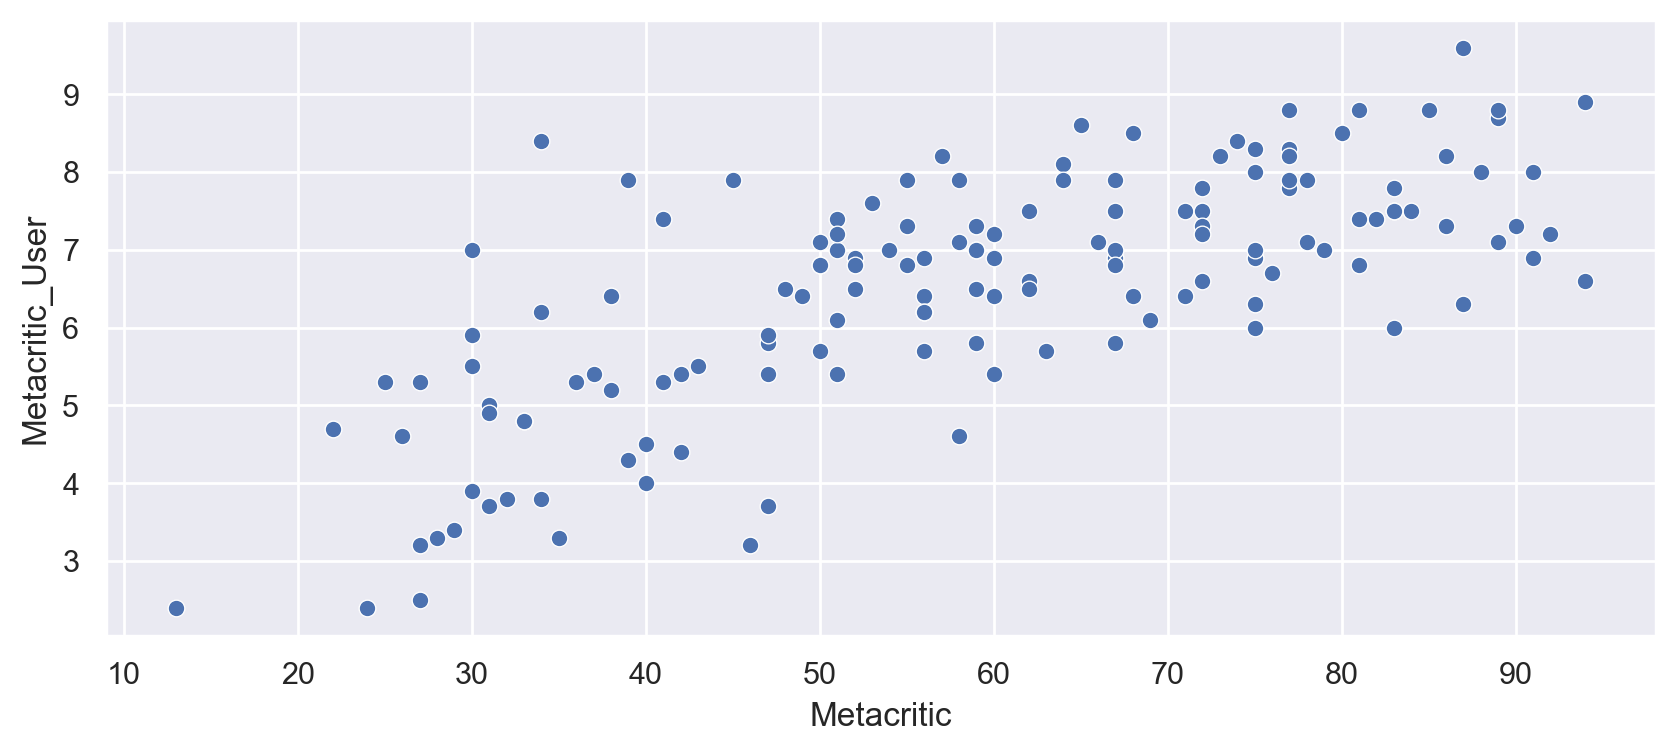

In [51]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(y = 'Metacritic_User', x = "Metacritic", data = all_sites)

## Рейтинги от IMDB

И наконец, посмотрим на рейтинги от IMDB. Посмотрим на наиболее популярные фильмы.

**Нарисуем график scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

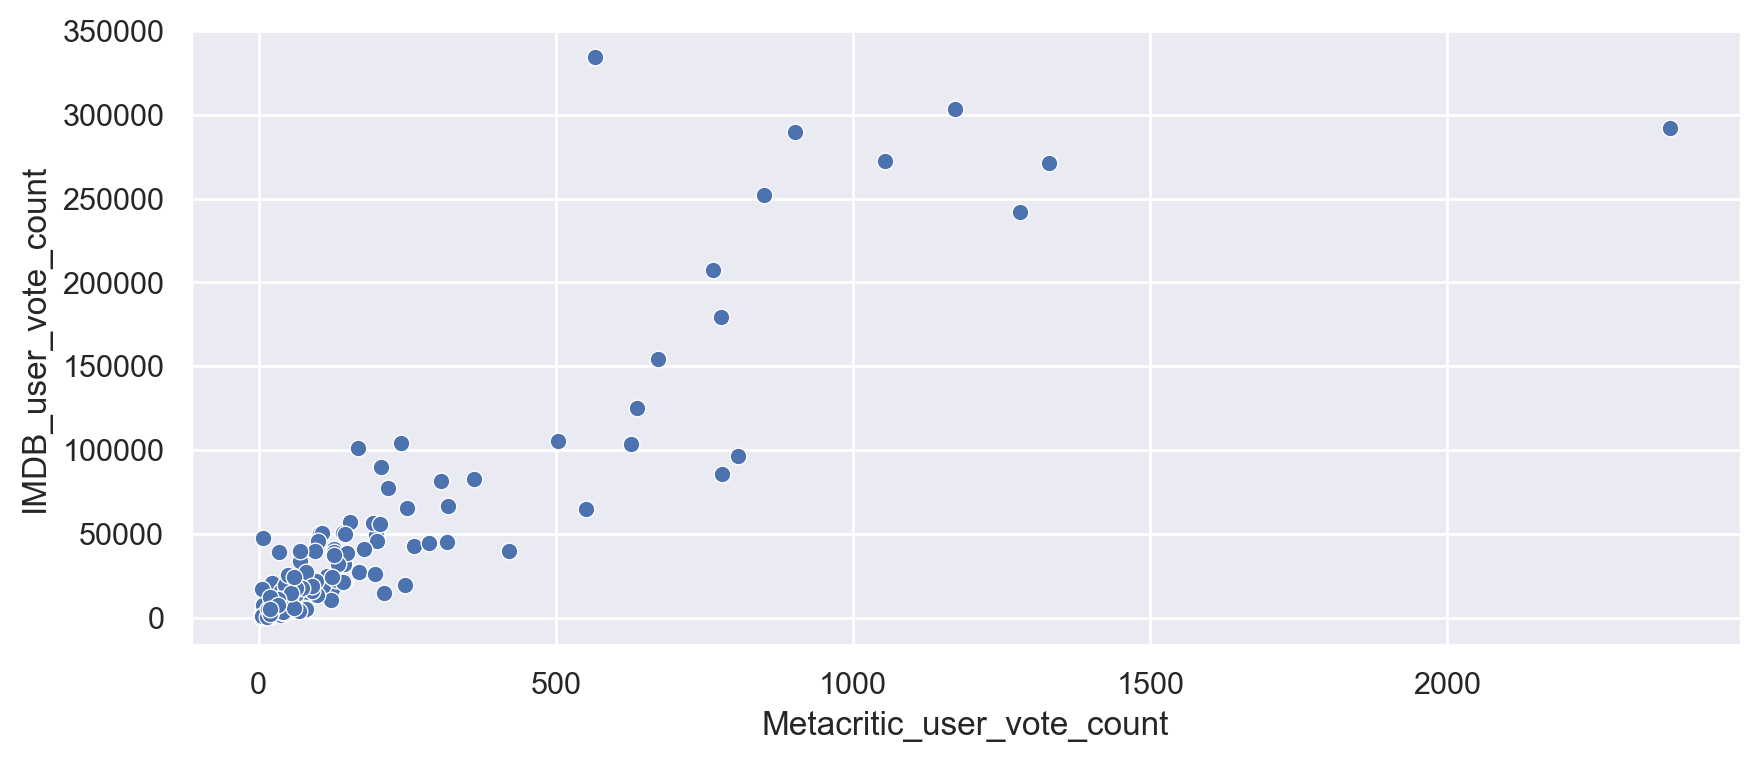

In [54]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(y = 'IMDB_user_vote_count', x = "Metacritic_user_vote_count", data = all_sites)

**Мы видим два "выброса" - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic. Что это за фильм?**

In [55]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Какой фильм получил наибольшее количество голосов на Metacritic?**

In [56]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Сравнение рейтингов Fandango с рейтингами других компаний

Давайте наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

**Объединим таблицу fandango с таблицей all_sites. Не каждый фильм в таблице Fandango найдётся в таблице all_sites, потому что некоторые фильмы Fandango имеют очень мало отзывов или вообще не имеют отзывов. Но мы хотим сравнивать только те фильмы, которые есть в обеих таблицах. Поэтому сделаем объединение "*inner* merge" двух наборов данных, сопоставляя строки по колонке FILM.**

In [57]:
new = all_sites.merge(fandango, how = 'inner', on = 'FILM')
new

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,5.0,4.5,14846,2015,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0,4.5,12640,2015,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,5.0,4.5,12055,2015,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,5.0,4.5,1793,2015,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,3.5,3.0,1021,2015,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,4.0,4.0,1348,2015,0.0
141,'71 (2015),97,82,83,7.5,7.2,60,24116,15,3.5,3.5,192,2015,0.0
142,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,3.5,3.5,118,2014,0.0
143,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,3.5,3.5,59,2015,0.0


In [58]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   RottenTomatoes              145 non-null    int64  
 2   RottenTomatoes_User         145 non-null    int64  
 3   Metacritic                  145 non-null    int64  
 4   Metacritic_User             145 non-null    float64
 5   IMDB                        145 non-null    float64
 6   Metacritic_user_vote_count  145 non-null    int64  
 7   IMDB_user_vote_count        145 non-null    int64  
 8   RT_DIFF                     145 non-null    int64  
 9   STARS                       145 non-null    float64
 10  RATING                      145 non-null    float64
 11  VOTES                       145 non-null    int64  
 12  YEAR                        145 non-null    object 
 13  STARS_DIFF                  145 non

In [59]:
new.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,STARS,RATING,VOTES,STARS_DIFF
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069,4.086207,3.841379,3817.696552,0.244828
std,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488,0.541169,0.502437,6368.668671,0.152721
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000,3.000000,2.700000,35.000000,0.000000
25%,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000,3.500000,3.500000,218.000000,0.100000
50%,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000,4.000000,3.900000,1430.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000,4.500000,4.200000,4279.000000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000,5.000000,4.800000,34846.000000,0.500000


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

Компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

**Добавим дополнительные колонки в all_sites, и запишем в них нормализованные значения рейтингов от 0 до 5.**


In [60]:
def norm100(num):
    return num/20
    
def norm10(num):
    return num/2

In [61]:
new['RTU_Norm'] = round(new['RottenTomatoes_User'].apply(norm100), 1)
new['RT_Norm'] = round(new['RottenTomatoes'].apply(norm100), 1)
new['Meta_Norm'] = round(new['Metacritic'].apply(norm100), 1)
new['MetaU_Norm'] = round(new['Metacritic_User'].apply(norm10), 1)
new['IMDB_Norm'] = round(new['IMDB'].apply(norm10), 1)


In [62]:
new.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_DIFF,STARS,RATING,VOTES,YEAR,STARS_DIFF,RTU_Norm,RT_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,5.0,4.5,14846,2015,0.5,4.3,3.7,3.3,3.6,3.9
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0,4.5,12640,2015,0.5,4.0,4.2,3.4,3.8,3.6
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,5.0,4.5,12055,2015,0.5,4.5,4.0,3.2,4.0,3.9
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,5.0,4.5,1793,2015,0.5,4.2,0.9,1.1,2.4,2.7
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,3.5,3.0,1021,2015,0.5,1.4,0.7,1.4,1.7,2.6


**Далее создадим DataFrame с названием norm_scores, в котором оставим только нормализованные рейтинги.**

In [65]:
norm_scores = new[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm']]

In [66]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,5.0,4.5,3.7,4.3,3.3,3.6,3.9
1,5.0,4.5,4.2,4.0,3.4,3.8,3.6
2,5.0,4.5,4.0,4.5,3.2,4.0,3.9
3,5.0,4.5,0.9,4.2,1.1,2.4,2.7
4,3.5,3.0,0.7,1.4,1.4,1.7,2.6


### Сравнение распределений рейтингов от разных компаний


Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?


**Нарисуем график, сравнивающий распределения нормализованных рейтингов от всех компаний.**


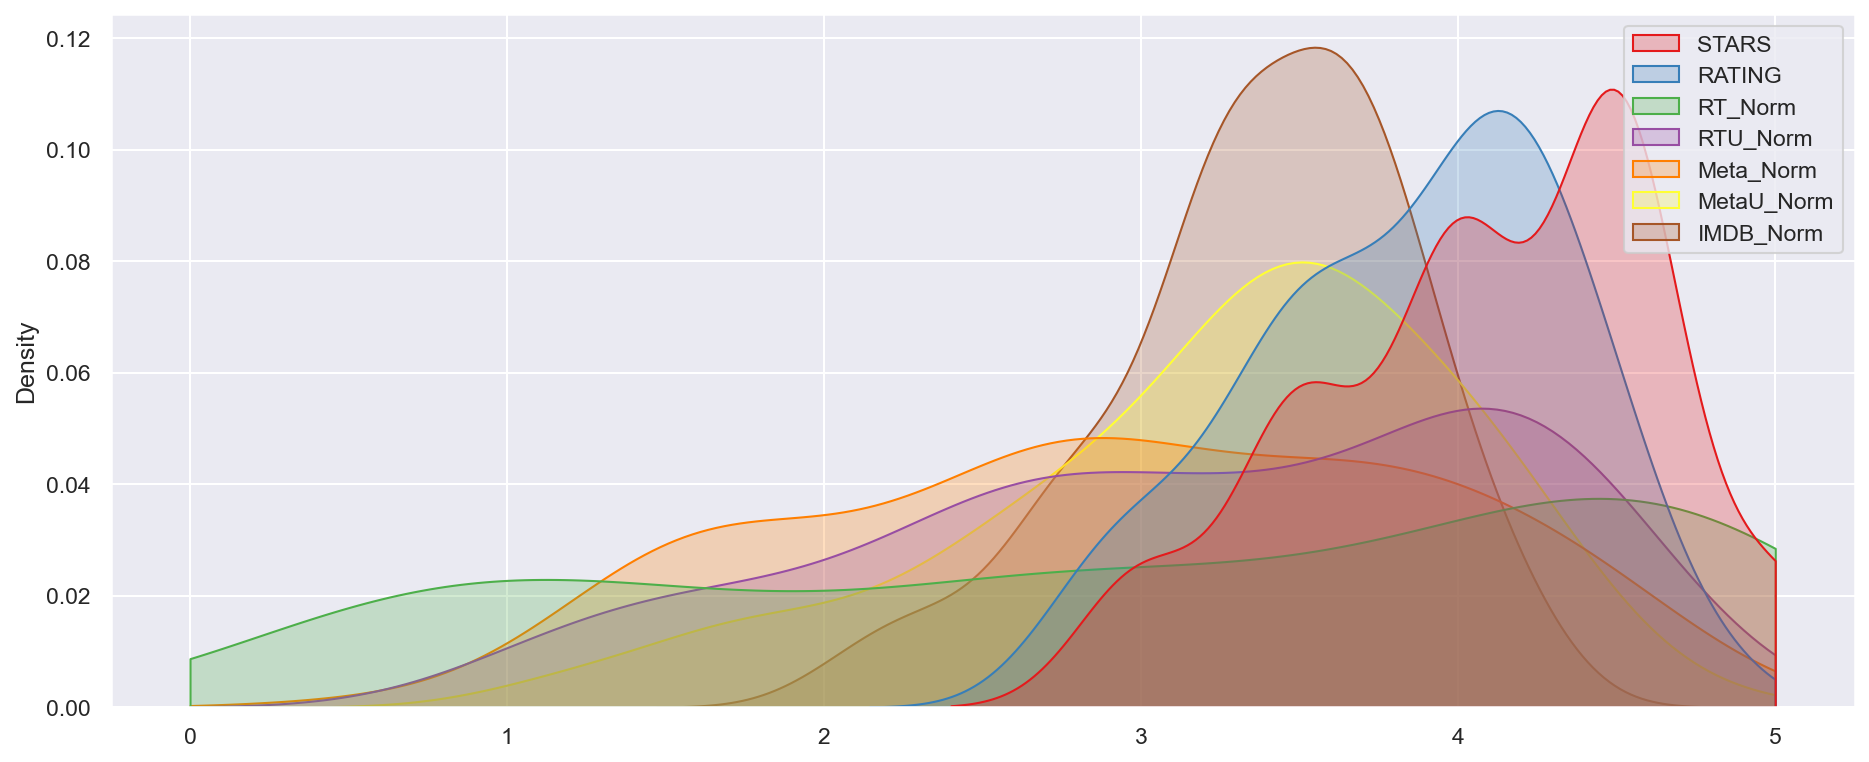

In [67]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax);

**Мы сразу видим, что рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.** 

<AxesSubplot:ylabel='Density'>

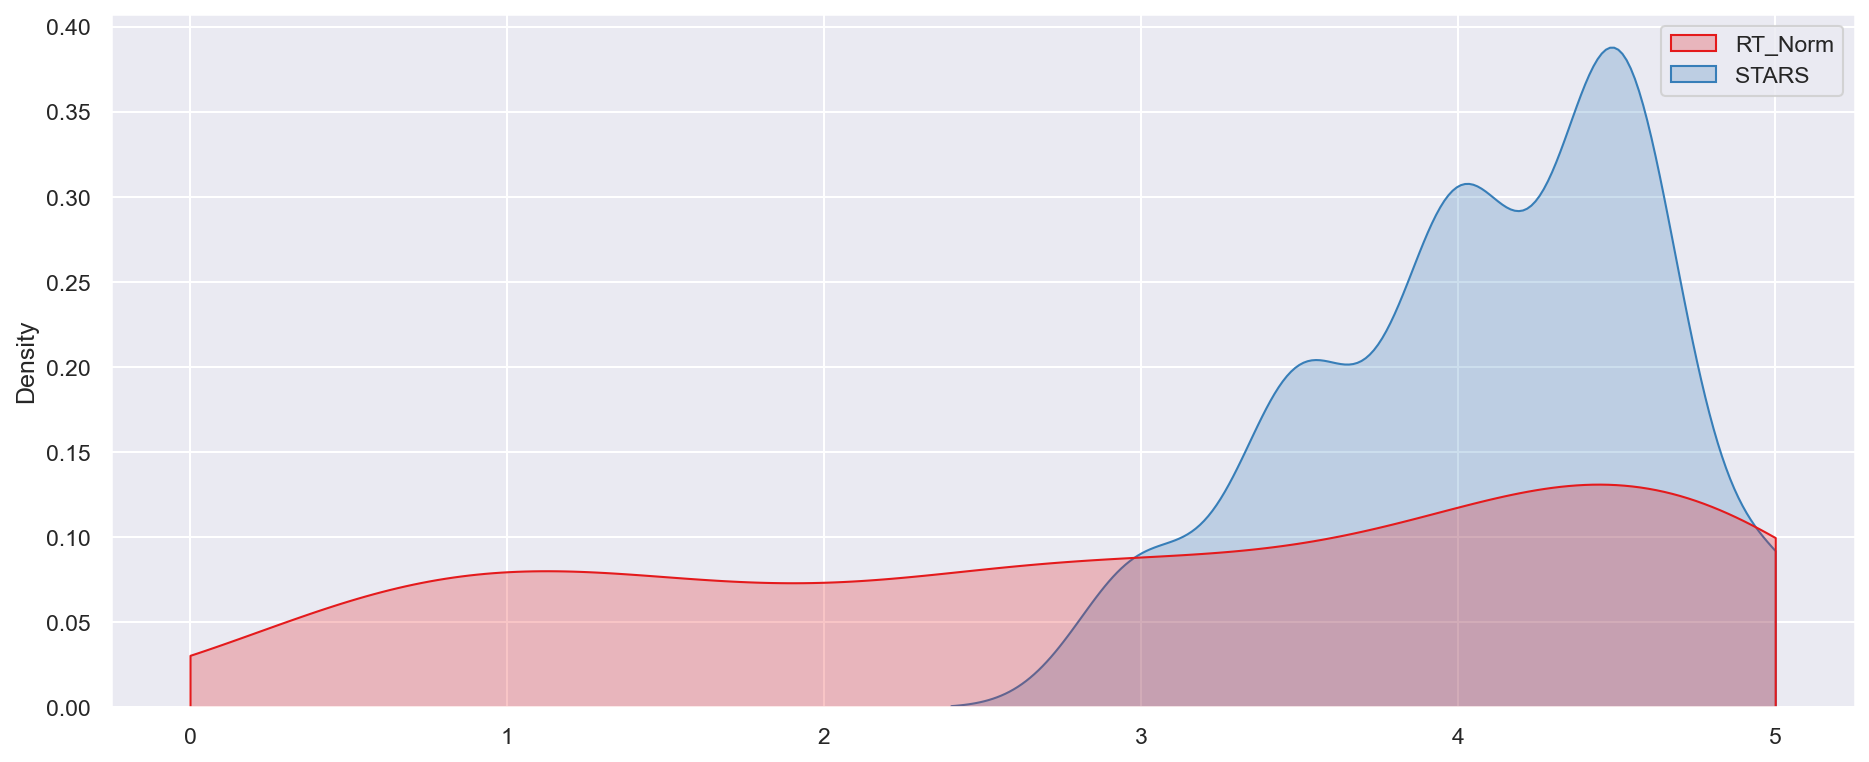

In [52]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)

**Нарисуем график histplot, сравнивающий все нормализованные рейтинги.**

<AxesSubplot:ylabel='Count'>

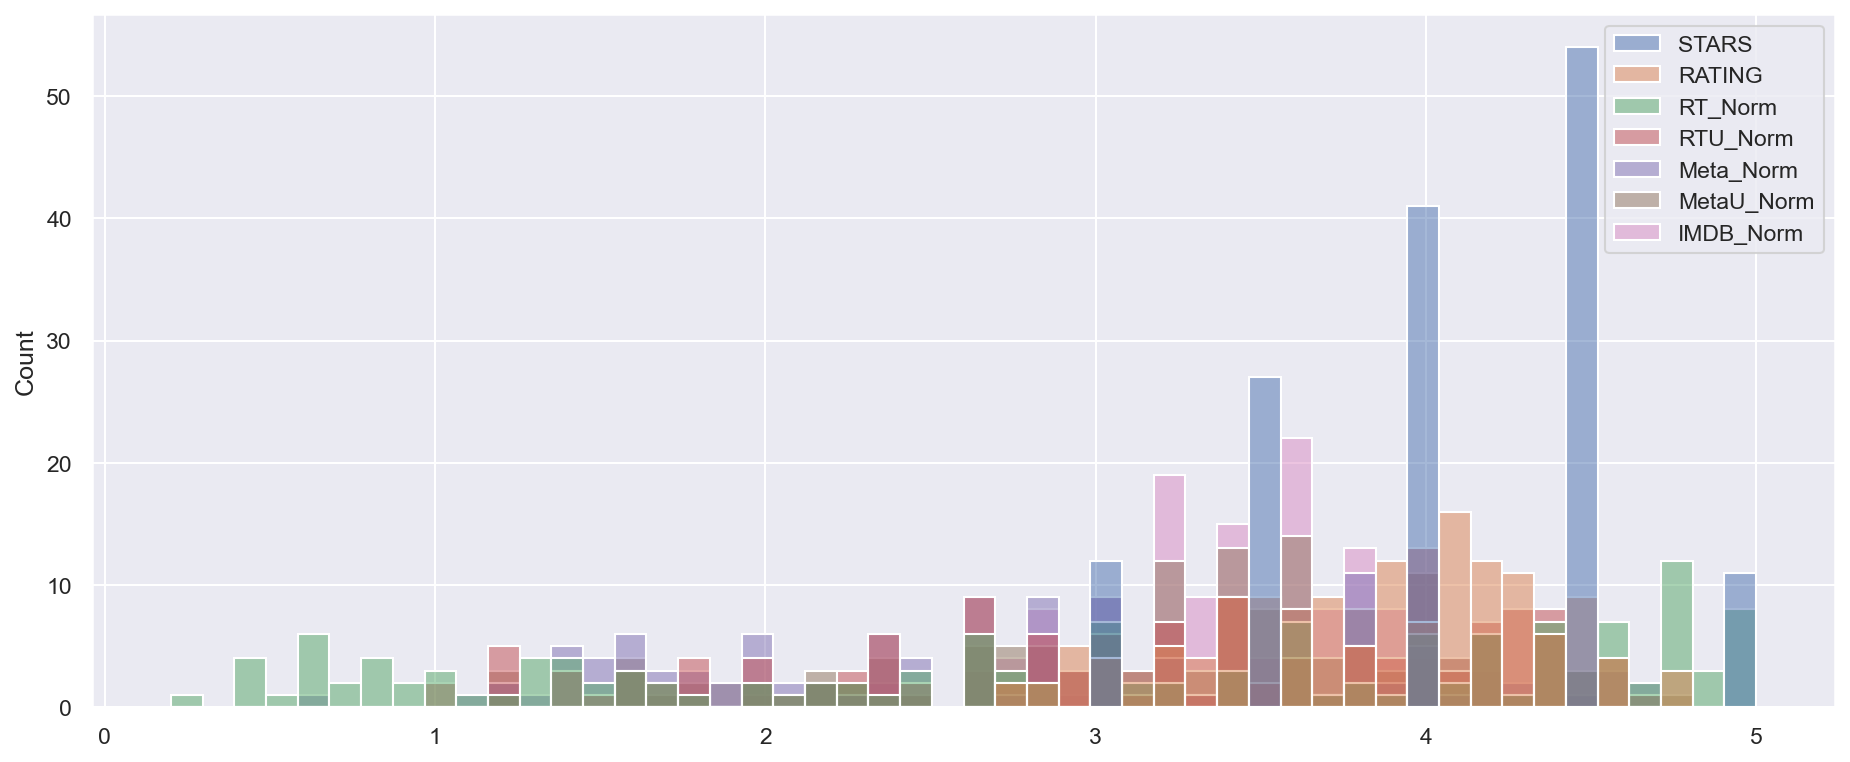

In [68]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norm_scores,bins=50)


### Как различные компании оценивают фильмы с наименьшими рейтингами?

**Нарисуем график clustermap для всех нормализованных рейтингов.**

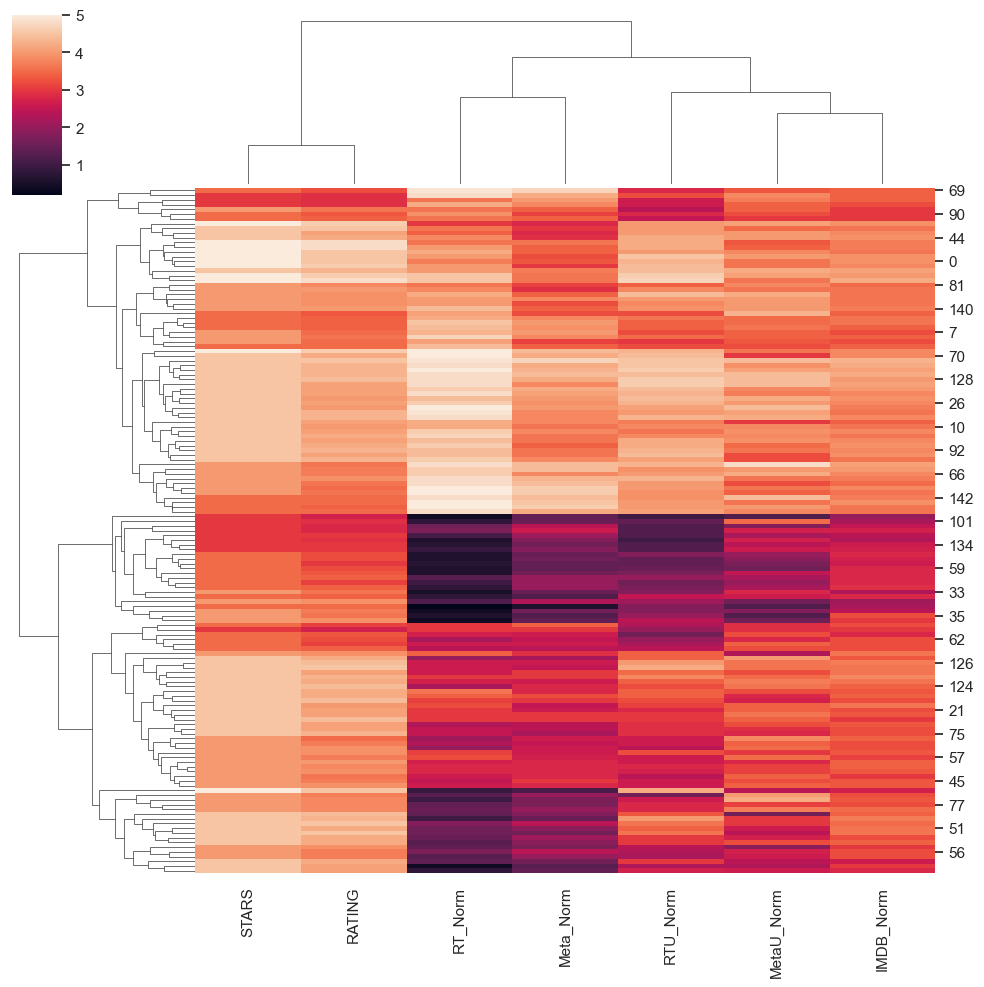

In [69]:
sns.clustermap(data = norm_scores);

**Мы видели, что рейтинги Fandango явно выше рейтингов других компаний. Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic - какие это 10 фильмов? Какие нормализованные рейтинги дали этим фильмам другие компании?**

In [70]:
norm_scores = new[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm', 'FILM']]

In [73]:
norm_scores.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm,FILM
132,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
15,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
48,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
53,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
105,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
33,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
35,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
58,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
59,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
60,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**Визуализируем распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.**

<AxesSubplot:ylabel='Density'>

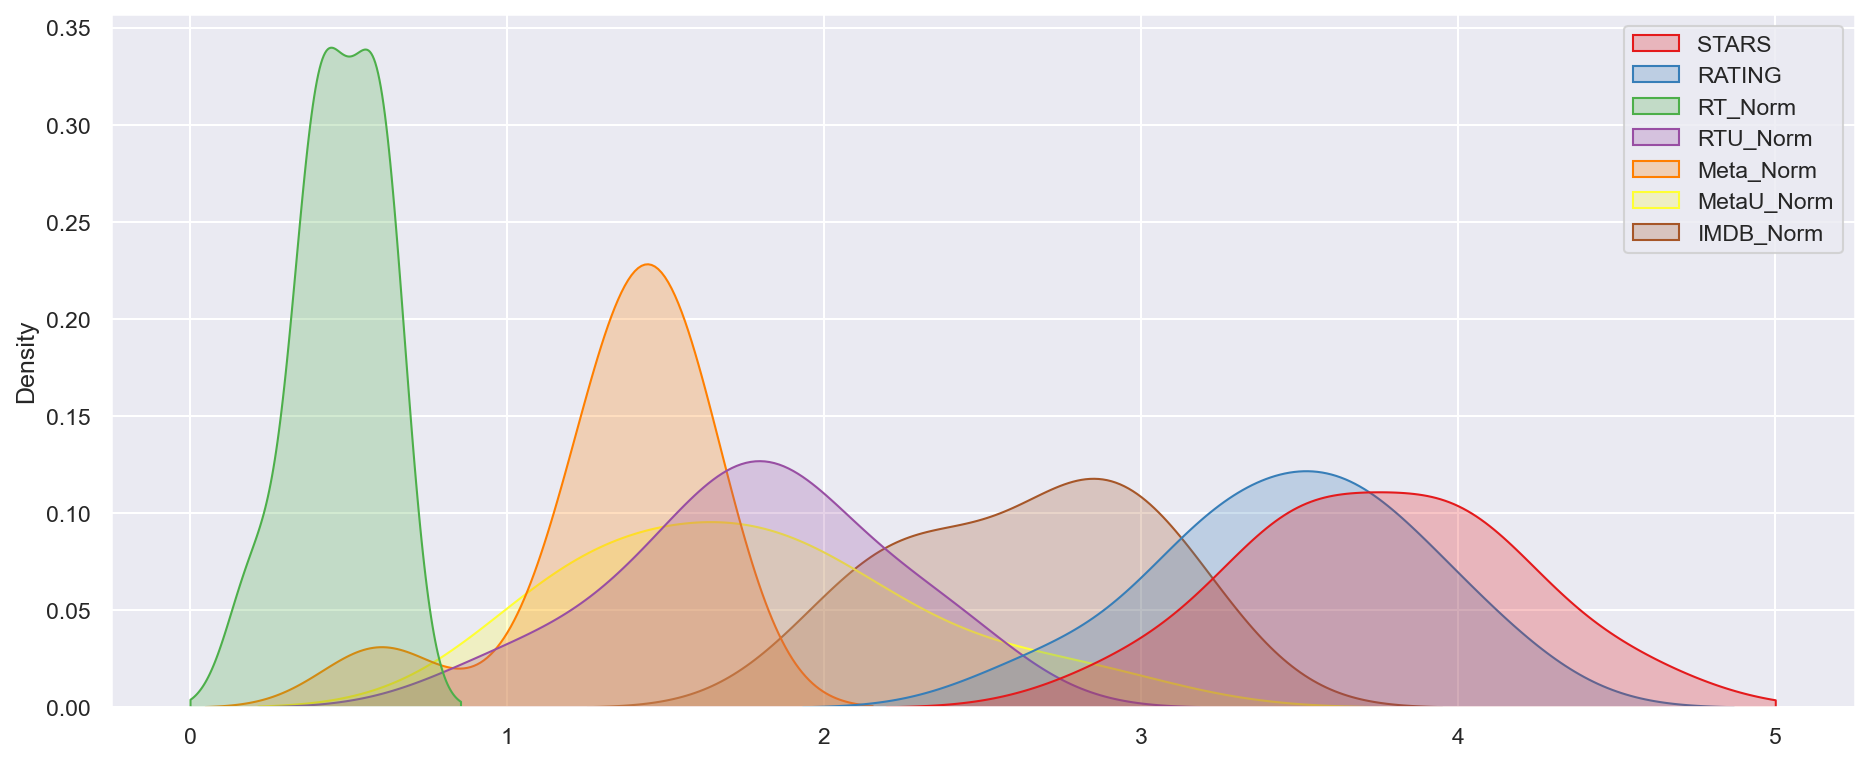

In [74]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores.nsmallest(10,'RT_Norm'),clip=[0,5],shade=True,palette='Set1',ax=ax)

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">
  
**Выводы: вот это да! Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными!**  
    
**Больше всего отличается фильм [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний!**

In [75]:
norm_scores.iloc[15]

STARS                    4.5
RATING                   4.1
RT_Norm                  0.4
RTU_Norm                 2.3
Meta_Norm                1.3
MetaU_Norm               2.3
IMDB_Norm                3.0
FILM          Taken 3 (2015)
Name: 15, dtype: object

In [76]:
0.4+2.3+1.3+2.3+3

9.3

In [77]:
9.3/5

1.86